In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sn

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn


                                              0.0/10.7 MB ? eta -:--:--
                                              0.0/10.7 MB ? eta -:--:--
                                              0.0/10.7 MB ? eta -:--:--
                                              0.0/10.7 MB ? eta -:--:--
                                             0.1/10.7 MB 599.1 kB/s eta 0:00:18
                                             0.2/10.7 MB 756.6 kB/s eta 0:00:14
     -                                       0.3/10.7 MB 999.9 kB/s eta 0:00:11
     -                                        0.4/10.7 MB 1.3 MB/s eta 0:00:09
     --                                       0.6/10.7 MB 1.5 MB/s eta 0:00:07
     --                                       0.6/10.7 MB 1.4 MB/s eta 0:00:08
     --                                       0.6/10.7 MB 1.4 MB/s eta 0:00:08
     --                                       0.6/10.7 MB 1.4 MB/s eta 0:00:08
     --                                       0.6/10.7 MB 1.4 MB/s eta 0:00:0

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.2/7.6 MB 1.2 MB/s eta 0:00:07
     --                                       0.4/7.6 MB 2.0 MB/s eta 0:00:04
     --                                       0.4/7.6 MB 2.0 MB/s eta 0:00:04
     --                                       0.4/7.6 MB 2.0 MB/s eta 0:00:04
     --                                       0.4/7.6 MB 2.0 MB/s eta 0:00:04
     --                                       0.4/7.6 MB 1.0 MB/s eta 0:00:08
     ---                                      0.6/7.6 MB 1.3 MB/s eta 0:00:06
     ---                                      0.6/7.6 MB 1.4 MB/s eta 0:00:06
     ---             

In [9]:
# !pip install sklearn
# !pip install scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB 3.2 MB/s eta 0:00:03
                                              0.1/8.3 MB 3.2 MB/s eta 0:00:03
                                              0.1/8.3 MB 3.2 MB/s eta 0:00:03
                                              0.1/8.3 MB 3.2 MB/s eta 0:00:03
                                              0.1/8.3 MB 3.2 MB/s eta 0:00:03
                                              0.1/8.3 MB 3.2 MB/s eta 0:00:03
                                              0.1/8.3 MB 3.2 MB/s eta 0:00:03
                                              0.1/8.3 MB 218.5 kB/s eta 0:00:38
                                              0.1/8.3 MB 218.5 kB/s eta 0:00:38
          

In [14]:
stock=pd.read_csv('data.csv')

In [15]:
stock.head(5)

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2007-10-17,315.54,317.32,311.11,317.06,12048900,13.498014,323.694527,269.702473,308.31,...,47.102,46.2860,44.1214,1541.24,1538.53,1562.47,13892.54,13912.94,14078.69,320.13
1,2007-10-18,318.02,321.01,314.56,320.13,24553800,13.603549,326.077599,271.663401,317.06,...,47.280,46.4535,44.2096,1540.08,1541.24,1554.41,13888.96,13892.54,14015.12,322.68
2,2007-10-19,327.61,329.57,321.94,322.68,31546400,13.859332,328.706664,273.269336,320.13,...,47.246,46.5460,44.2940,1500.63,1540.08,1561.80,13522.02,13888.96,14093.08,325.70
3,2007-10-22,319.65,327.83,318.46,325.70,13315400,14.319036,331.696571,274.420429,322.68,...,47.239,46.6560,44.3972,1506.33,1500.63,1548.71,13566.97,13522.02,13984.80,338.22
4,2007-10-23,330.96,339.14,330.33,338.22,13573800,15.652638,337.035777,274.425223,325.70,...,47.310,46.7945,44.5146,1519.59,1506.33,1538.53,13676.23,13566.97,13912.94,338.25


In [16]:
stock=stock.rename(columns={'Close(t)':'Close'})

In [17]:
stock.shape

(3229, 64)

In [18]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

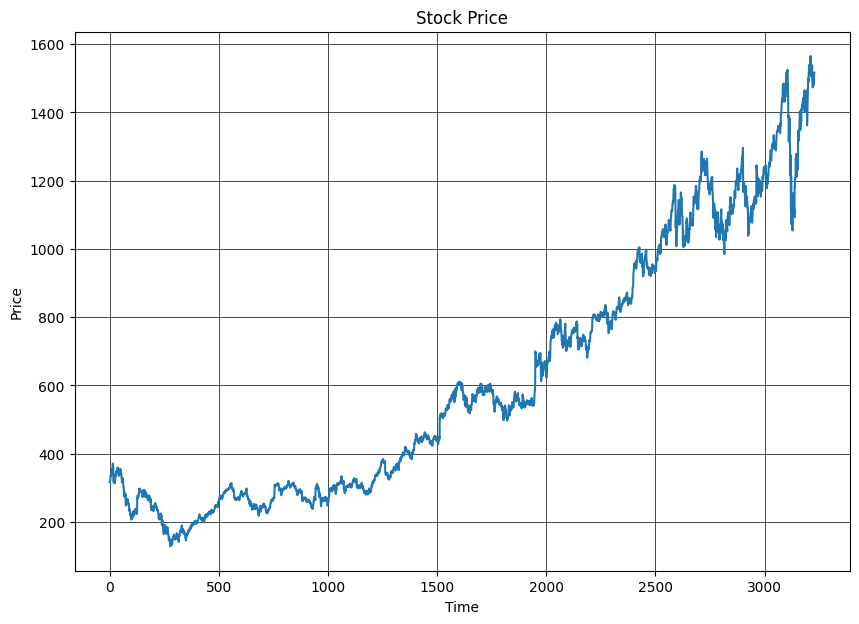

In [20]:
stock['Close'].plot(figsize=(10,7))
plt.title("Stock Price")
plt.ylabel('Price')
plt.xlabel('Time')
plt.grid(which='major',color='k',linestyle='-',linewidth=0.5)
plt.show()

In [21]:
stock=stock.drop(columns='Date_col')

In [34]:
stock=stock.drop(columns='Date')

In [35]:
#creating dataset

In [36]:
def create_train_test_set(df):
    features=df.drop(columns=['Close_forcast'],axis=1)
    target=df['Close_forcast']  #this represents the column we have to predict i.e price on next date
    data_len=df.shape[0]
    
    train_split=int(data_len*0.85)
    val_split=train_split+int(data_len*0.10)
    #remaining data set(0.05) for testing
    
    X_train,X_val,X_test=features[:train_split],features[train_split:val_split],features[val_split:]
    Y_train,Y_val,Y_test=target[:train_split],target[train_split:val_split],target[val_split:]
    return X_train,X_val,X_test,Y_train,Y_val,Y_test

In [37]:
X_train,X_val,X_test,Y_train,Y_val,Y_test=create_train_test_set(stock)

In [38]:
len(X_train)

2744

In [39]:
len(X_val)

322

In [40]:
len(X_test)

163

In [41]:
#model training

In [42]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [44]:
model.score(X_train,Y_train)  #99% acccuracy

0.9991692571138712

0        320.13
1        322.68
2        325.70
3        338.22
4        338.25
         ...   
3224    1496.82
3225    1480.54
3226    1507.24
3227    1516.65
3228    1504.63
Name: Close_forcast, Length: 3229, dtype: float64

In [48]:
Y_val_predict=model.predict(X_val)

In [56]:
X_val['prediction']=Y_val_predict

In [57]:
X_val

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),prediction
2744,1171.10,1190.94,1165.95,1189.99,1462700,26.839524,1275.646548,1168.288452,1175.06,1177.59,...,181.093,179.5015,177.1412,2887.89,2877.13,2896.72,25971.06,25857.07,25952.48,1192.152420
2745,1182.00,1190.69,1166.16,1171.60,1785800,27.664168,1272.968836,1162.312164,1189.99,1175.06,...,180.893,179.5570,177.3336,2888.92,2887.89,2888.60,25998.92,25971.06,25974.99,1173.118995
2746,1179.70,1187.86,1169.22,1182.14,2003400,28.528048,1272.192596,1158.080404,1171.60,1189.99,...,180.676,179.8175,177.6036,2904.18,2888.92,2878.05,26145.99,25998.92,25995.87,1185.633585
2747,1188.00,1188.00,1173.52,1177.98,1208800,29.609697,1272.051894,1153.613106,1182.14,1171.60,...,180.438,180.0225,177.8214,2904.98,2904.18,2871.68,26154.67,26145.99,25916.54,1180.856201
2748,1177.77,1181.82,1158.46,1159.83,1704800,31.872441,1273.776381,1146.286619,1177.98,1182.14,...,179.916,180.0950,177.9340,2888.80,2904.98,2877.13,26062.12,26154.67,25857.07,1163.773285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,1347.90,1351.35,1341.66,1346.87,1658500,19.773275,1359.090549,1279.997451,1348.49,1344.25,...,202.904,202.5905,197.3996,3168.80,3168.57,3145.91,28135.38,28132.05,28015.06,1346.963237
3062,1355.00,1363.53,1350.61,1360.70,1406400,21.630522,1364.163045,1277.640955,1346.87,1348.49,...,203.527,202.9065,197.8064,3191.45,3168.80,3135.96,28235.89,28135.38,27909.60,1364.819119
3063,1362.41,1364.33,1350.77,1354.89,1647400,22.921309,1368.497118,1276.811882,1360.70,1346.87,...,204.320,203.2205,198.2268,3192.52,3191.45,3132.52,28267.16,28235.89,27881.72,1356.209038
3064,1357.00,1359.43,1350.46,1351.91,1166500,23.686137,1371.992774,1277.248226,1354.89,1360.70,...,205.028,203.5275,198.7066,3191.14,3192.52,3141.63,28239.28,28267.16,27911.30,1355.704326


In [59]:
X_val['Output']=np.where(X_val['Close']<=X_val['prediction'],"Bullish","Bearish")

In [66]:
X_val.loc[X_val['Output']=="Bearish"] #checking rows having bearish values

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),prediction,Output
2750,1168.96,1176.27,1158.62,1174.27,1298100,33.830724,1272.793948,1137.471052,1167.11,1159.83,...,180.3645,178.1510,2907.95,2904.31,2888.92,26405.76,26246.96,25998.92,1173.416608,Bearish
2754,1184.25,1196.86,1174.09,1193.89,1657600,30.501378,1256.195757,1134.190243,1179.56,1172.12,...,180.7795,178.5926,2915.56,2919.37,2904.31,26492.21,26562.05,26246.96,1193.888559,Bearish
2757,1204.09,1208.45,1197.83,1207.08,1780600,17.534194,1222.438888,1152.302112,1207.36,1194.06,...,180.7370,178.9400,2913.98,2914.00,2929.67,26458.31,26439.93,26743.50,1205.577664,Bearish
2758,1213.00,1224.20,1203.19,1208.53,1658200,15.023106,1216.253211,1156.160789,1207.08,1207.36,...,180.7300,179.0878,2924.59,2913.98,2919.37,26651.21,26458.31,26562.05,1207.695599,Bearish
2759,1206.67,1224.52,1199.66,1207.64,2009000,14.719697,1215.462893,1156.584107,1208.53,1207.08,...,180.7415,179.2162,2923.43,2924.59,2915.56,26773.94,26651.21,26492.21,1207.539181,Bearish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,1299.25,1311.12,1290.75,1300.14,1277100,20.762799,1334.649597,1251.598403,1301.86,1312.59,...,198.9285,193.0000,3103.54,3108.46,3096.63,27766.29,27821.09,27781.96,1298.578551,Bearish
3047,1303.00,1306.90,1289.36,1293.67,1388800,19.624270,1333.841040,1255.343960,1300.14,1301.86,...,199.2365,193.1924,3110.29,3103.54,3120.46,27875.62,27766.29,28004.89,1292.284884,Bearish
3055,1327.00,1327.98,1314.32,1326.96,1220400,11.566332,1330.270663,1284.005337,1318.94,1294.74,...,201.3745,195.2318,3117.43,3112.76,3153.63,27677.79,27649.78,28164.00,1325.993584,Bearish
3058,1339.94,1348.00,1334.00,1342.89,880300,16.931764,1346.554028,1278.826972,1342.99,1339.39,...,201.8890,196.1810,3132.52,3135.96,3093.20,27881.72,27909.60,27502.81,1341.295043,Bearish


In [67]:
#saving the model
import pickle
pickle.dump(model,open('model.pkl','wb'))